<a href="https://colab.research.google.com/github/muniprasadreddy/my-colab_work/blob/main/IMDB_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt



In [ ]:
df=pd.read_csv(r'/content/IMDB-Dataset.csv' ,encoding='latin-1')

In [ ]:
df.head()

,Ratings,Reviews,Movies,Resenhas
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f..."
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...",Disaster Movie,"Estou escrevendo isso na esperanÃ§a de que isso seja colocado sobre a revisÃ£o anterior deste ""filme"". Como alguÃ©m pode achar divertido esse desleixo estÃ¡ completamente alÃ©m de mim. Antes de mais nada, um filme de parÃ³dia intitulado ""Filme de desastre"" deveria ser, de fato, uma parÃ³dia de filmes de desastre. Agora eu jÃ¡ vi 1 (sim, conte-os, 1) filme de desastre sendo falsificado, sendo ""Twister"". Como Juno, Homem de Ferro, Batman, O Hulk, Alvin e os Esquilos, Amy Winehouse ou Hancock se registram como filmes de Desastre? Selzterwater e Failburg mostraram mais uma vez que nÃ£o possuem nenhum tipo de habilidade e humor de escrita. Infelizmente, tendo sido torturado com Date Movie e Epic Movie, sei exatamente o que esperar desses dois ... nenhum enredo, nenhuma piada, apenas mÃ¡s referÃªncias e cenas refeitas de outros filmes. AlguÃ©m deveria ter informado a eles que a sÃ¡tira Ã© mais do qu

In [ ]:
df.shape

(150000, 4)

In [ ]:
##Data cleaning  and preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

from nltk.corpus import stopwords
stop_words=stopwords.words('english')
new_stopword=['would', 'shall', 'could','might']
stop_words.extend(new_stopword)
stop_words.remove('not')
stop_words=set(stop_words)
print(stop_words)



{'more', 'this', 'too', 'over', 'under', 'hers', 'haven', "isn't", "it's", 'll', 'do', "wasn't", 's', 'hasn', 'would', 'them', 'he', 'while', 'but', 'with', "mightn't", 'is', "weren't", 'my', 'shan', 'have', 'itself', 'below', 'most', 'did', 'myself', 'which', 'who', 'doing', 'the', 'needn', 'her', 'any', 'or', "needn't", 'ma', 'about', "aren't", 'being', 'hadn', 'both', 'ain', 're', 'we', 'mightn', 'because', 'an', 'out', 'was', 'if', "haven't", 't', 'should', 'she', 'can', 'that', 'yourselves', 'himself', 'y', 'other', 'our', 'down', 'yours', 'm', 'very', 'it', "you'll", 'before', 'couldn', "shouldn't", 'during', 'don', 'just', 'all', "hadn't", 'now', "hasn't", "couldn't", 'again', 'be', 'above', 'then', 'off', 'what', 'ourselves', "mustn't", 'isn', 'when', 'wasn', "she's", "shan't", 'your', 'these', 'having', 'mustn', "didn't", 've', 'they', 'i', 'how', 'd', 'after', 'further', "won't", 'been', 'here', 'of', 'weren', 'me', 'once', 'their', 'each', 'against', 'are', 'aren', 'a', 'mig

In [ ]:

## removing special character
def remove_special_character(content):
   return re.sub('\w+'," ",content)
   #re.sub('\[[^&@#!]]*\]', '', content)


In [ ]:
# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

In [ ]:
#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

In [ ]:
 #Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content


In [ ]:
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)
    return content

In [ ]:

df['Reviews_clean']=df['Reviews'].apply(data_cleaning)

df['Reviews_clean'].head(5)

0    
1    
2    
3    
4    
Name: Reviews_clean, dtype: object

In [ ]:
df.shape

(150000, 5)

In [ ]:
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [ ]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [ ]:
df['Reviews_clean'].describe()

count     150000
unique         1
top             
freq      150000
Name: Reviews_clean, dtype: object

In [ ]:
df['Reviews'].describe()

count                                                150000
unique                                               149780
top       Really the best animation that ever existed I ...
freq                                                      5
Name: Reviews, dtype: object

In [ ]:
print('Unique reviews:%s' % df.Reviews.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149780
Unique movie names:14206
No of ratings:150000


In [ ]:
##Exploratory Data Analysis

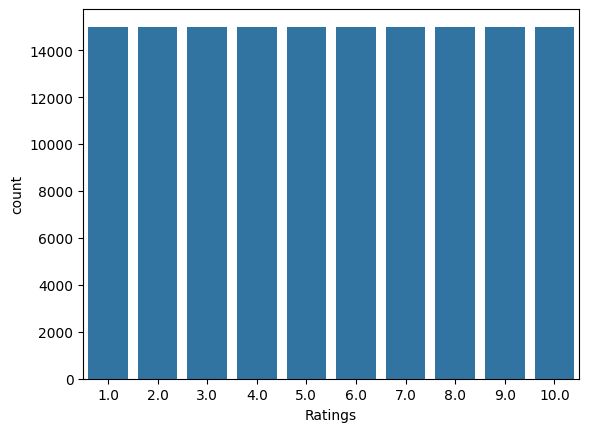

1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: Ratings, dtype: int64


In [ ]:
sns.countplot(x=df['Ratings'])    ### checking  for imbalance
plt.show()
print(df['Ratings'].value_counts())

(-0.5, 1499.5, 799.5, -0.5)

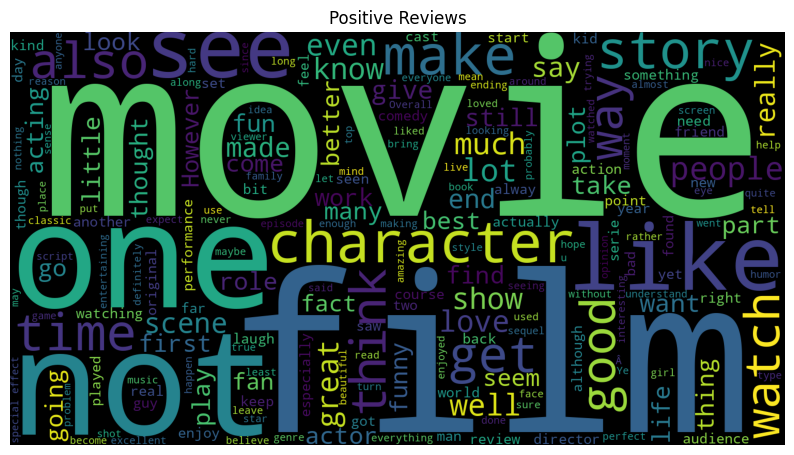

In [ ]:
sentences=df['Reviews']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))

pos_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(pos)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

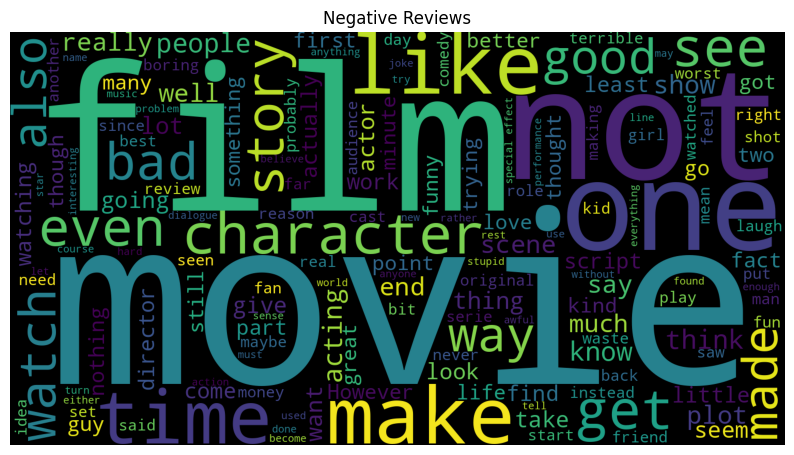

In [ ]:
neg_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

In [ ]:
#Basic Statistic of Review data

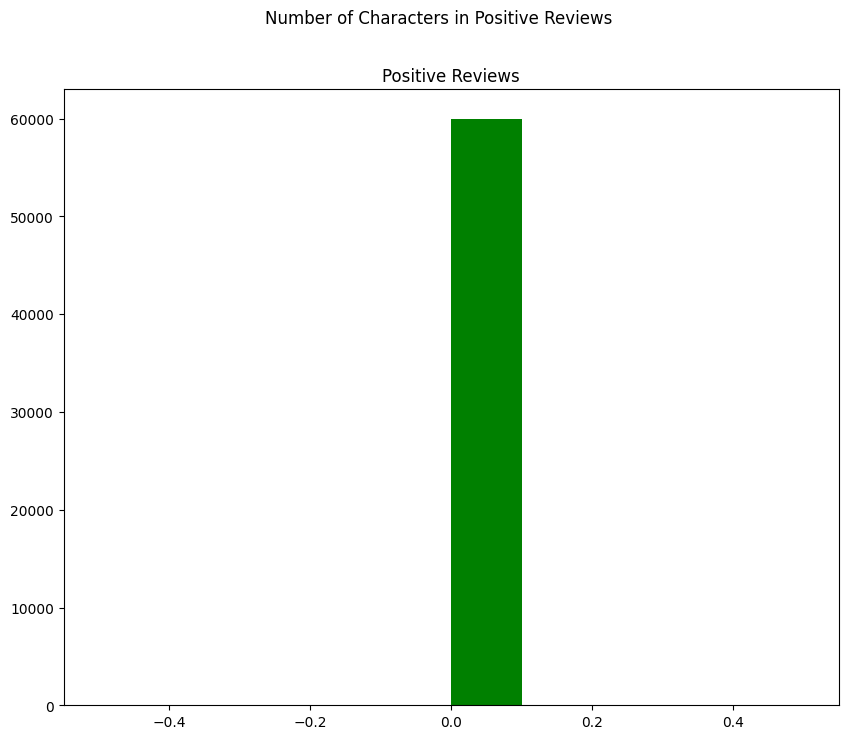

In [ ]:
# Visualization of number of characters in reviews

figure, (pos_ax) = plt.subplots( figsize=(10, 8))

len_pos_review = df[df['Ratings'] >= 7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review, color='green')
pos_ax.set_title('Positive Reviews')
figure.suptitle('Number of Characters in Positive Reviews')
plt.show()


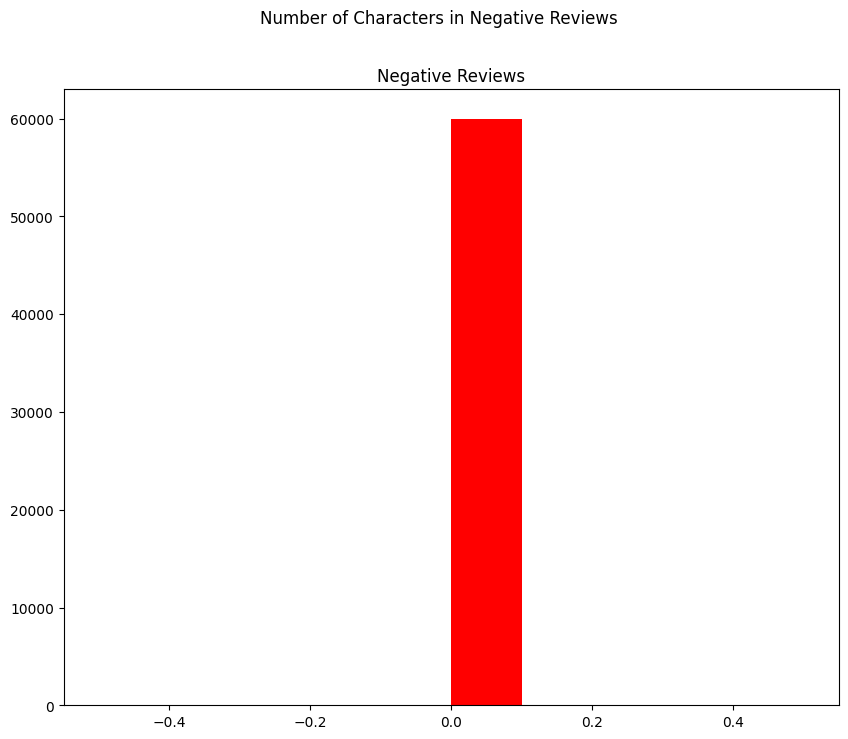

In [ ]:
figure,(neg_ax)=plt.subplots(figsize=(10,8))
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in Negative Reviews')
plt.show()

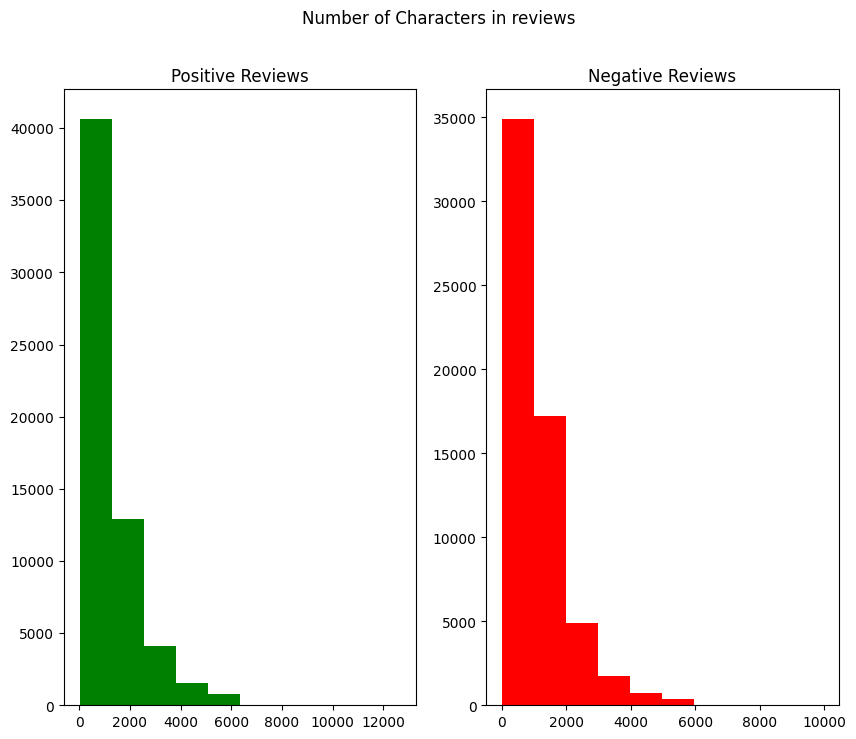

In [ ]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(10,8))
len_pos_review=df[df['Ratings']>=7]['Reviews'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')

len_neg_review=df[df['Ratings']<=4]['Reviews'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()
